In [79]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [80]:
def evaluate_dt(df):
    # Split the data into features and target variable
    column_names = list(df.columns[:-1])
    y = df['Label'].astype('category')
    X = df[column_names]

    # Train a decision tree classifier
    dectree = DecisionTreeClassifier()
    dectree.fit(X, y)
    
    # Visualize the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(dectree, filled=True, max_depth=8)
    plt.show()
    
    # Make predictions on the data
    y_pred = dectree.predict(X)

    # Calculate the confusion matrix and plot it as a heatmap
    conf_mat = confusion_matrix(y, y_pred)
    fig, axs = plt.subplots(ncols=1, figsize=(8,6))
    sb.heatmap(conf_mat, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axs)
    
    # Print the accuracy measures from the confusion matrix
    accuracy = dectree.score(X, y)
    tp = conf_mat[1][1] # True Positives : Y (1) predicted Y (1)
    fp = conf_mat[0][1] # False Positives : N (0) predicted Y (1)
    tn = conf_mat[0][0] # True Negatives : N (0) predicted N (0)
    fn = conf_mat[1][0] # False Negatives : Y (1) predicted N (0)

    print("Accuracy on data: {:.2f}%".format(accuracy * 100))
    print("TPR :\t", (tp/(tp + fn)))
    print("TNR :\t", (tn/(tn + fp)))
    print()

    print("FPR :\t", (fp/(tn + fp)))
    print("FNR :\t", (fn/(tp + fn)))


In [81]:
df_oversampled = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/oversampled_train.csv")
df_smote_tomek = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/smote_tomek_train.csv")
df_smoteen = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/smoteenn_train.csv")
df_undersampled = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/undersampled_train.csv")
df_test = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/test_data.csv")

Evaluating decision tree on oversampled dataset:


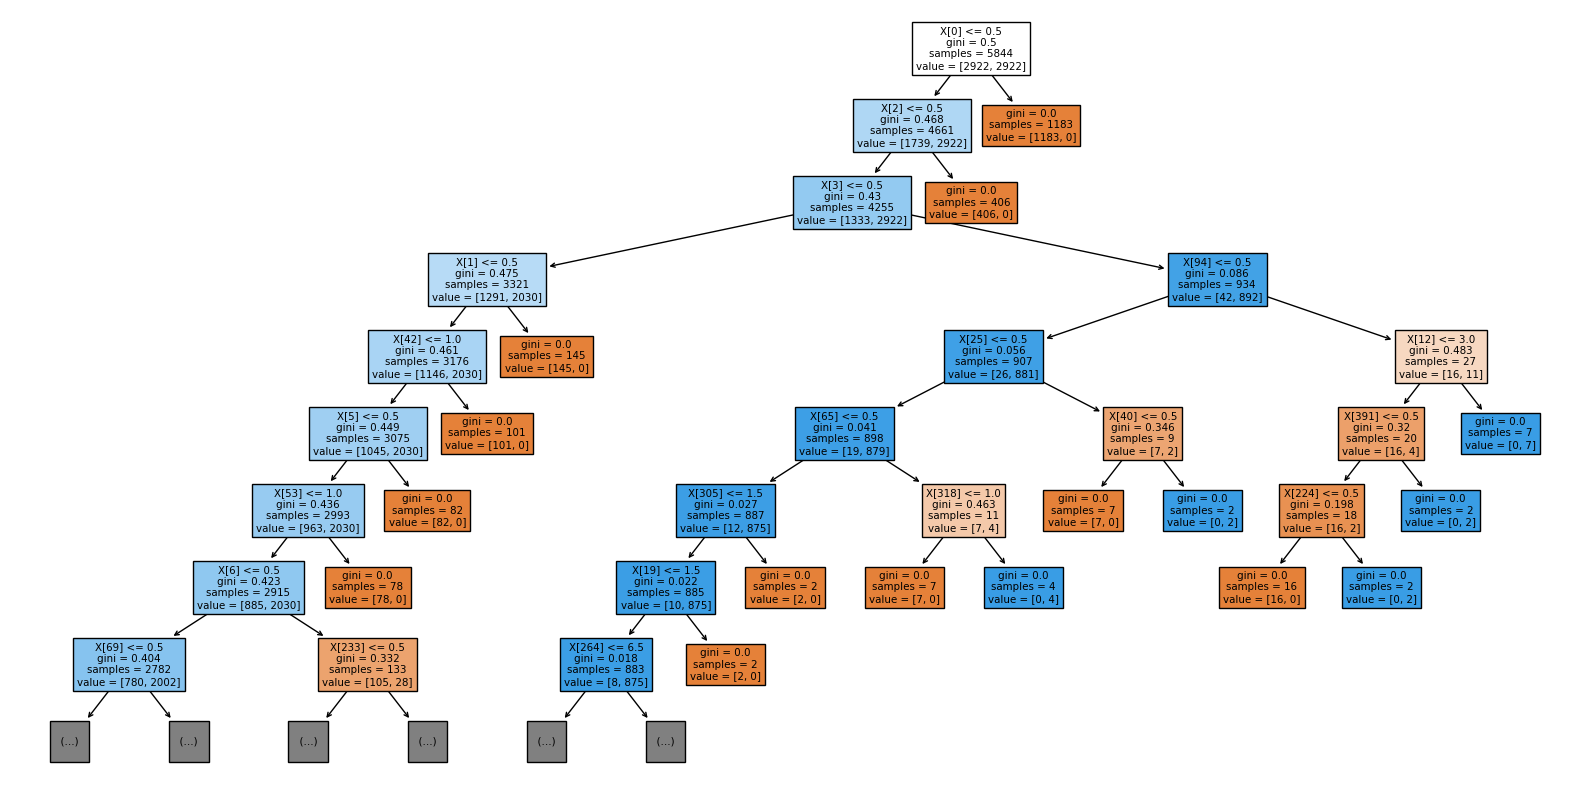

Accuracy on data: 97.31%
TPR :	 0.9948665297741273
TNR :	 0.9514031485284052

FPR :	 0.0485968514715948
FNR :	 0.00513347022587269


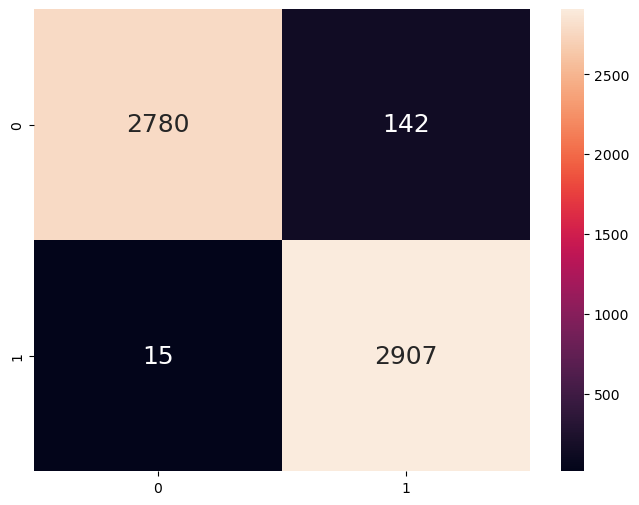

In [82]:
print("Evaluating decision tree on oversampled dataset:")
evaluate_dt(df_oversampled)



Evaluating decision tree on SMOTE-TOMEK dataset:


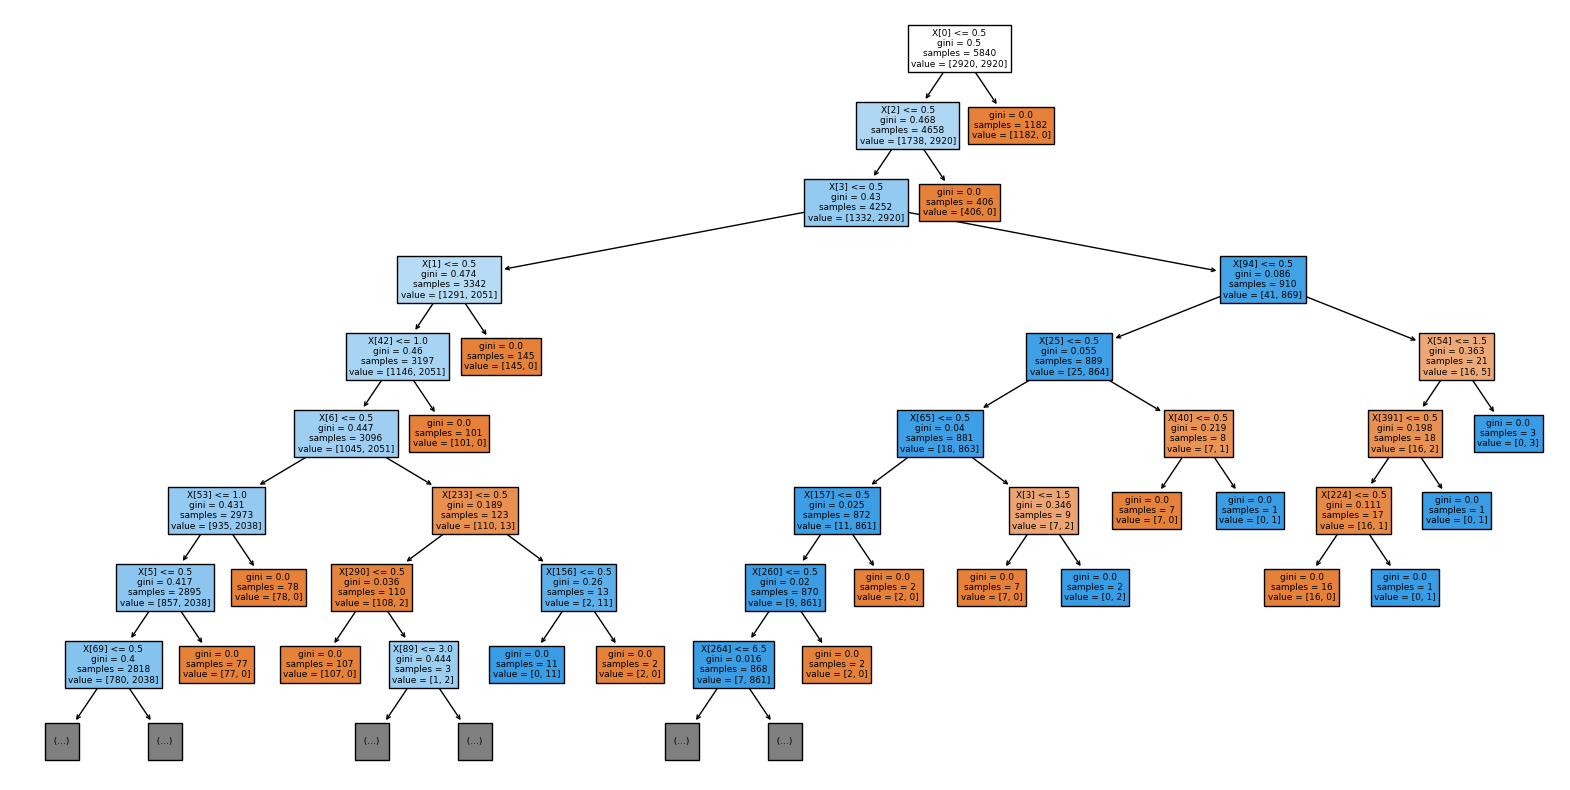

Accuracy on data: 97.35%
TPR :	 0.9945205479452055
TNR :	 0.9523972602739726

FPR :	 0.047602739726027396
FNR :	 0.005479452054794521


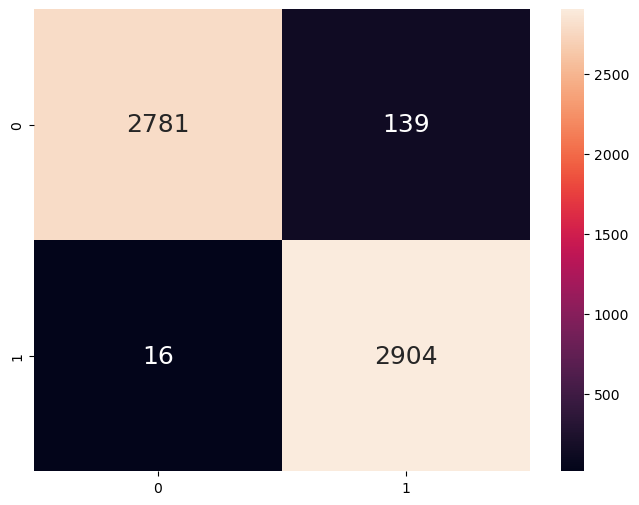

In [83]:
print("Evaluating decision tree on SMOTE-TOMEK dataset:")
evaluate_dt(df_smote_tomek)



Evaluating decision tree on SMOTEENN dataset:


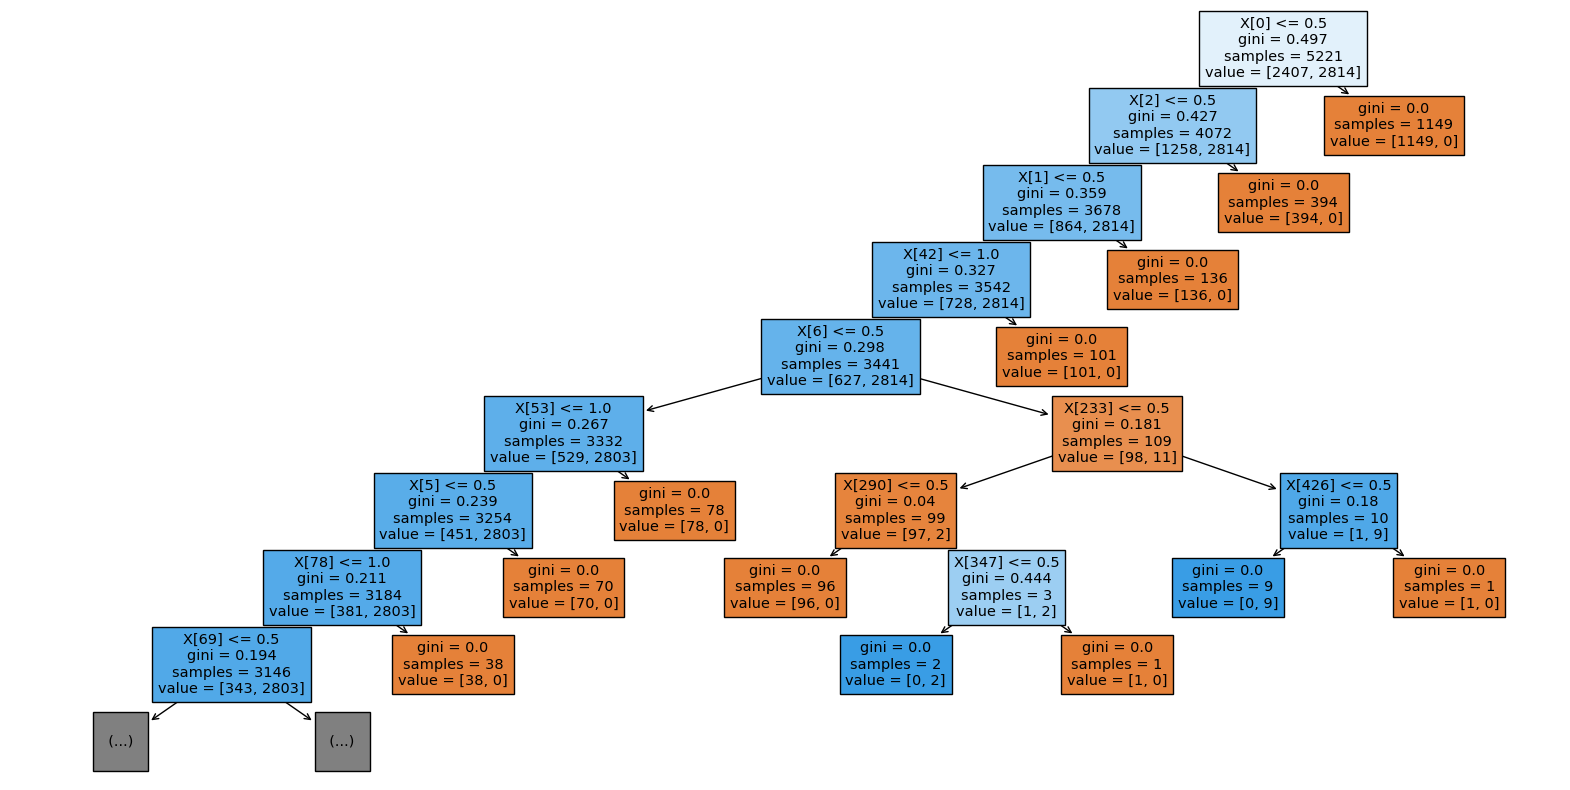

Accuracy on data: 100.00%
TPR :	 1.0
TNR :	 1.0

FPR :	 0.0
FNR :	 0.0


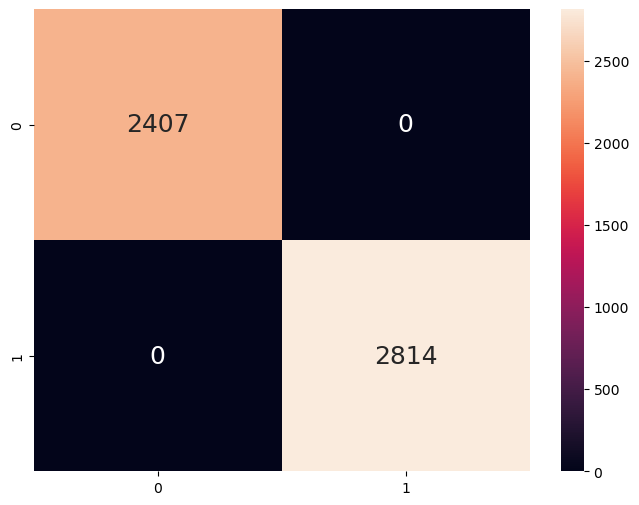

In [84]:
print("Evaluating decision tree on SMOTEENN dataset:")
evaluate_dt(df_smoteen)


Evaluating decision tree on undersampled dataset:


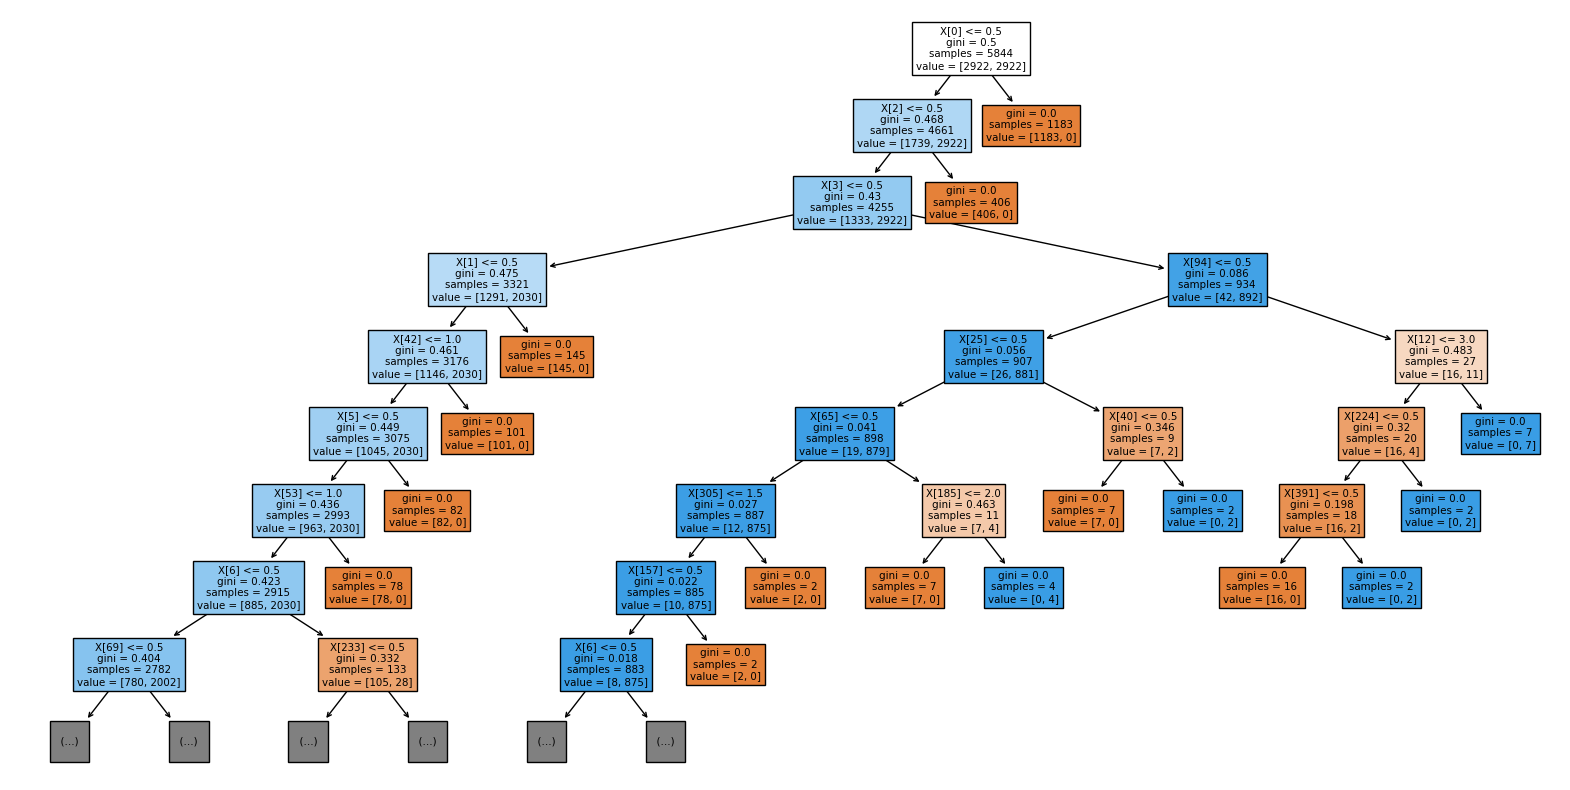

Accuracy on data: 97.31%
TPR :	 0.9948665297741273
TNR :	 0.9514031485284052

FPR :	 0.0485968514715948
FNR :	 0.00513347022587269


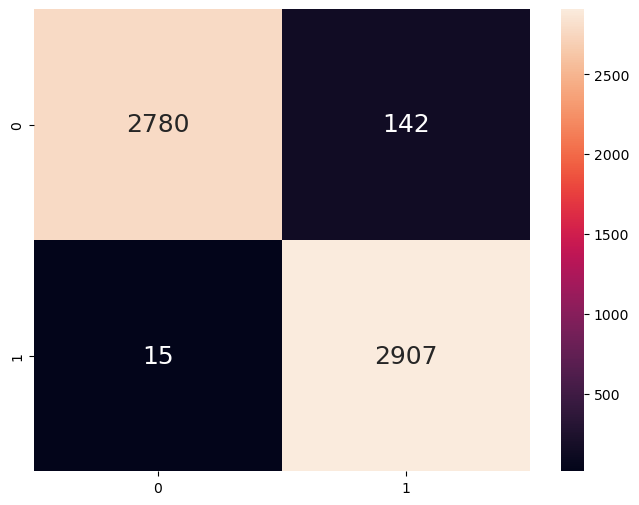

In [85]:
print("Evaluating decision tree on undersampled dataset:")
evaluate_dt(df_undersampled)

In [86]:
def compare_results(df_oversampled, df_smote_tomek, df_smoteen, df_undersampled, df_test):
    # Split the test data into features and target variable
    column_names = list(df_test.columns[:-1])
    y_test = df_test['Label'].astype('category')
    X_test = df_test[column_names]

    # Evaluate decision tree classifier on each dataset
    results = []
    for df in [df_oversampled, df_smote_tomek, df_smoteen, df_undersampled]:
        column_names = list(df.columns[:-1])
        y = df['Label'].astype('category')
        X = df[column_names]
        dectree = DecisionTreeClassifier()
        dectree.fit(X, y)
        accuracy = dectree.score(X_test, y_test)
        results.append(accuracy)

    # Rank the datasets based on their accuracy scores
    rankings = sorted(range(len(results)), key=lambda k: results[k], reverse=True)

    # Print the rankings
    print("Rankings 1st is best while 4th is worst:")
    for i, r in enumerate(rankings):
        if r == 0:
            print("{}. Oversampled ({:.2f}%)".format(i+1, results[r]*100))
        elif r == 1:
            print("{}. SMOTE-TOMEK ({:.2f}%)".format(i+1, results[r]*100))
        elif r == 2:
            print("{}. SMOTEENN ({:.2f}%)".format(i+1, results[r]*100))
        else:
            print("{}. Undersampled ({:.2f}%)".format(i+1, results[r]*100))


In [87]:
compare_results(df_oversampled, df_smote_tomek, df_smoteen, df_undersampled,df_test)


Rankings 1st is best while 4th is worst:
1. Oversampled (92.46%)
2. Undersampled (92.17%)
3. SMOTE-TOMEK (91.98%)
4. SMOTEENN (88.79%)


# Comparison

Undersampling involves randomly removing samples from the majority class to balance the dataset. In this case, it resulted in the highest accuracy. It's possible that the undersampled dataset retained enough representative samples of the majority class, leading to a model with better generalization capabilities when tested on the unseen df_test dataset.

Oversampling involves adding more instances of the minority class by replicating existing samples. This approach resulted in slightly lower accuracy compared to undersampling. It's possible that oversampling led to overfitting, causing the model to perform slightly worse on the test dataset.

SMOTE-TOMEK combines the SMOTE technique, which generates synthetic samples of the minority class, with Tomek Links, which removes samples that are difficult to classify. In this case, the combination of these two techniques led to a slightly lower accuracy compared to the first two methods. The synthetic samples generated by SMOTE might not have accurately represented the underlying distribution of the minority class, leading to a less accurate model.

SMOTEEN is another combination of techniques, using SMOTE for oversampling and the Edited Nearest Neighbors (ENN) method for undersampling. The lower accuracy of the model trained on the SMOTEENN dataset might be due to the ENN method removing too many samples or the SMOTE method generating less representative synthetic samples. This could result in a model with weaker generalization capabilities when tested on the df_test dataset.

